In [21]:
import os
import splitfolders 


input_dir = os.path.join('C:/Users/lilia/OneDrive/Documents/Lilian/ING4_S2/IA/Data/Pokemon')
output_dir = os.path.join('C:/Users/lilia/OneDrive/Documents/Lilian/ING4_S2/IA/Data/Pokemon_Splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 427 files [00:01, 217.61 files/s]


In [22]:
train_dir = os.path.join('C:/Users/lilia/OneDrive/Documents/Lilian/ING4_S2/IA/Data/Pokemon_Splitted/train/')
test_dir = os.path.join('C:/Users/lilia/OneDrive/Documents/Lilian/ING4_S2/IA/Data/Pokemon_Splitted/val/')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [47]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 372 images belonging to 5 classes.
Found 97 images belonging to 6 classes.


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=5, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 60, 60, 8)         6152      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)        

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(
      train_generator,  
      epochs=100,
      verbose=1)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 1.5634 - accuracy: 0.3199
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 1.4730 - accuracy: 0.2796
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 1.4070 - accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 4s 1s/step - loss: 1.3095 - accuracy: 0.4301
Epoch 5/100
2/2 [==============================] - 3s 2s/step - loss: 1.1829 - accuracy: 0.5618
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 1.0864 - accuracy: 0.5672
Epoch 7/100
2/2 [==============================] - 4s 1s/step - loss: 1.1109 - accuracy: 0.5323
Epoch 8/100
2/2 [==============================] - 4s 2s/step - loss: 0.9928 - accuracy: 0.5968
Epoch 9/100
2/2 [==============================] - 4s 2s/step - loss: 0.9892 - accuracy: 0.5914
Epoch 10/100
2/2 [==============================] - 4s 2s/step - loss: 0.9527 - accuracy: 0.6075
Epoch 11/100
2/2 [=====================

2/2 [==============================] - 10s 6s/step - loss: 0.0650 - accuracy: 0.9866
Epoch 86/100
2/2 [==============================] - 11s 5s/step - loss: 0.0446 - accuracy: 0.9866
Epoch 87/100
2/2 [==============================] - 6s 2s/step - loss: 0.0504 - accuracy: 0.9892
Epoch 88/100
2/2 [==============================] - 4s 2s/step - loss: 0.0492 - accuracy: 0.9919
Epoch 89/100
2/2 [==============================] - 4s 2s/step - loss: 0.0403 - accuracy: 0.9919
Epoch 90/100
2/2 [==============================] - 4s 2s/step - loss: 0.0384 - accuracy: 0.9892
Epoch 91/100
2/2 [==============================] - 4s 1s/step - loss: 0.0376 - accuracy: 0.9919
Epoch 92/100
2/2 [==============================] - 4s 2s/step - loss: 0.0336 - accuracy: 0.9919
Epoch 93/100
2/2 [==============================] - 4s 2s/step - loss: 0.0321 - accuracy: 0.9946
Epoch 94/100
2/2 [==============================] - 4s 2s/step - loss: 0.0258 - accuracy: 0.9946
Epoch 95/100
2/2 [=======================

[[1.2407977e-09 3.2036230e-06 2.7331648e-08 9.9999687e+01 3.1470539e-04]]

Pikachu


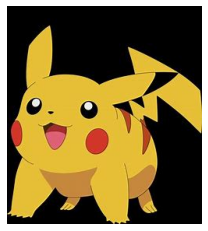

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def import_and_predict(image_data, label):
    
    #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    #predict the image
    prediction = model.predict(img_reshape)
    print(prediction*100)
    
    label_prediction = label[np.argmax(prediction)]
    
    return label_prediction
 
label = os.listdir(test_dir)
image1_dir = os.path.join(test_dir+'Pikachu/OIP (2).jpg')

prediction = import_and_predict(image1_dir, label)
print("")
print(prediction)

[[1.6338247e-15 3.3294825e-11 5.3121919e-08 6.8840068e-06 9.9999985e+01]]

Salameche


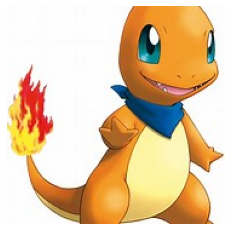

In [31]:
image2_dir = os.path.join(test_dir+'Salameche/th (9).jpg')

prediction = import_and_predict(image2_dir, label)
print("")
print(prediction)

In [32]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

In [69]:
divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/37200

model_bayes = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn
                                        ),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(5), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(5)
    
])
model_bayes.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_9  (None, 60, 60, 8)        12304     
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 30, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        2336      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 64)        18496     
                                                     

In [70]:
from tensorflow.keras.optimizers import Adam

def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=0.005),
              metrics = ['accuracy'],
              experimental_run_tf_function = True)

In [71]:
history_bayes = model_bayes.fit(
      train_generator,
      epochs=300,
      verbose=1)

Epoch 1/300
2/2 [==============================] - 5s 2s/step - loss: 5.0513 - accuracy: 0.2258
Epoch 2/300
2/2 [==============================] - 3s 1s/step - loss: 2.4265 - accuracy: 0.2231
Epoch 3/300
2/2 [==============================] - 3s 1s/step - loss: 2.1161 - accuracy: 0.2796
Epoch 4/300
2/2 [==============================] - 4s 2s/step - loss: 2.1146 - accuracy: 0.2769
Epoch 5/300
2/2 [==============================] - 4s 1s/step - loss: 2.1056 - accuracy: 0.2527
Epoch 6/300
2/2 [==============================] - 3s 1s/step - loss: 2.0732 - accuracy: 0.2742
Epoch 7/300
2/2 [==============================] - 3s 2s/step - loss: 2.0726 - accuracy: 0.3038
Epoch 8/300
2/2 [==============================] - 3s 2s/step - loss: 2.1006 - accuracy: 0.2070
Epoch 9/300
2/2 [==============================] - 3s 2s/step - loss: 2.1129 - accuracy: 0.2554
Epoch 10/300
2/2 [==============================] - 3s 2s/step - loss: 2.0313 - accuracy: 0.2957
Epoch 11/300
2/2 [=====================

2/2 [==============================] - 3s 1s/step - loss: 0.8824 - accuracy: 0.8172
Epoch 86/300
2/2 [==============================] - 4s 1s/step - loss: 0.9907 - accuracy: 0.8199
Epoch 87/300
2/2 [==============================] - 4s 2s/step - loss: 0.8568 - accuracy: 0.8253
Epoch 88/300
2/2 [==============================] - 4s 2s/step - loss: 0.8555 - accuracy: 0.8199
Epoch 89/300
2/2 [==============================] - 4s 2s/step - loss: 0.8751 - accuracy: 0.7957
Epoch 90/300
2/2 [==============================] - 3s 2s/step - loss: 0.8589 - accuracy: 0.8360
Epoch 91/300
2/2 [==============================] - 3s 2s/step - loss: 0.8635 - accuracy: 0.8065
Epoch 92/300
2/2 [==============================] - 3s 2s/step - loss: 0.8074 - accuracy: 0.8575
Epoch 93/300
2/2 [==============================] - 3s 2s/step - loss: 0.8110 - accuracy: 0.8468
Epoch 94/300
2/2 [==============================] - 3s 1s/step - loss: 0.8029 - accuracy: 0.8522
Epoch 95/300
2/2 [=========================

2/2 [==============================] - 3s 1s/step - loss: 0.6194 - accuracy: 0.9435
Epoch 169/300
2/2 [==============================] - 3s 1s/step - loss: 0.6327 - accuracy: 0.9167
Epoch 170/300
2/2 [==============================] - 3s 1s/step - loss: 0.7939 - accuracy: 0.8468
Epoch 171/300
2/2 [==============================] - 3s 1s/step - loss: 0.6455 - accuracy: 0.9301
Epoch 172/300
2/2 [==============================] - 3s 1s/step - loss: 0.6041 - accuracy: 0.9489
Epoch 173/300
2/2 [==============================] - 3s 1s/step - loss: 0.6458 - accuracy: 0.9059
Epoch 174/300
2/2 [==============================] - 3s 1s/step - loss: 0.6053 - accuracy: 0.9543
Epoch 175/300
2/2 [==============================] - 3s 1s/step - loss: 0.6754 - accuracy: 0.9220
Epoch 176/300
2/2 [==============================] - 3s 1s/step - loss: 0.6489 - accuracy: 0.9247
Epoch 177/300
2/2 [==============================] - 3s 1s/step - loss: 0.6417 - accuracy: 0.9382
Epoch 178/300
2/2 [===============

2/2 [==============================] - 3s 1s/step - loss: 0.4946 - accuracy: 0.9866
Epoch 252/300
2/2 [==============================] - 3s 2s/step - loss: 0.5666 - accuracy: 0.9677
Epoch 253/300
2/2 [==============================] - 3s 2s/step - loss: 0.5243 - accuracy: 0.9704
Epoch 254/300
2/2 [==============================] - 4s 2s/step - loss: 0.5925 - accuracy: 0.9409
Epoch 255/300
2/2 [==============================] - 4s 2s/step - loss: 0.5231 - accuracy: 0.9731
Epoch 256/300
2/2 [==============================] - 3s 2s/step - loss: 0.5207 - accuracy: 0.9651
Epoch 257/300
2/2 [==============================] - 3s 1s/step - loss: 0.5089 - accuracy: 0.9839
Epoch 258/300
2/2 [==============================] - 3s 2s/step - loss: 0.4954 - accuracy: 0.9812
Epoch 259/300
2/2 [==============================] - 3s 1s/step - loss: 0.4940 - accuracy: 0.9812
Epoch 260/300
2/2 [==============================] - 3s 2s/step - loss: 0.4906 - accuracy: 0.9839
Epoch 261/300
2/2 [===============

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def import_and_predict_bayes(image, true_label):

    #read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    predicted_probabilities = np.empty(shape=(300, 5))
    
    for i in range(300):
        
        predicted_probabilities[i] = model_bayes(img_resize[np.newaxis,...]).mean().numpy()[0]
        
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(5)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(5)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(5), pct_97p5, color='red')
    bar[true_label].set_color('green')
    bar = ax.bar(np.arange(5), pct_2p5-0.02, color='white')
    ax.set_xticklabels([''] + [x for x in label])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()

<ipython-input-72-6d7c933e944d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [x for x in label])


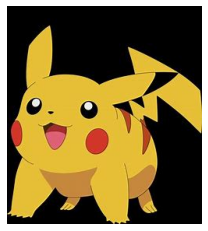

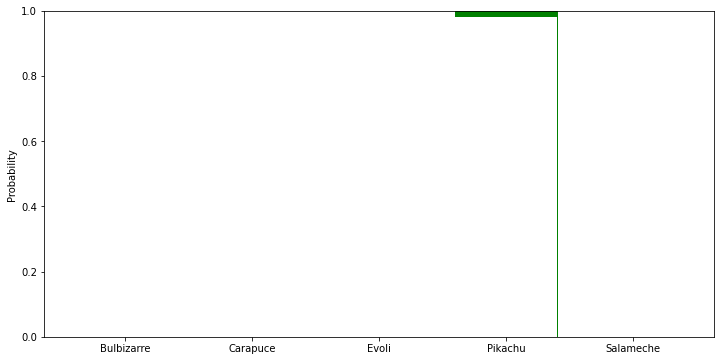

In [77]:
import_and_predict_bayes(image1_dir, label.index('Pikachu'))

<ipython-input-72-6d7c933e944d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [x for x in label])


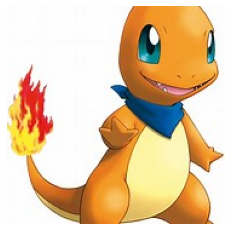

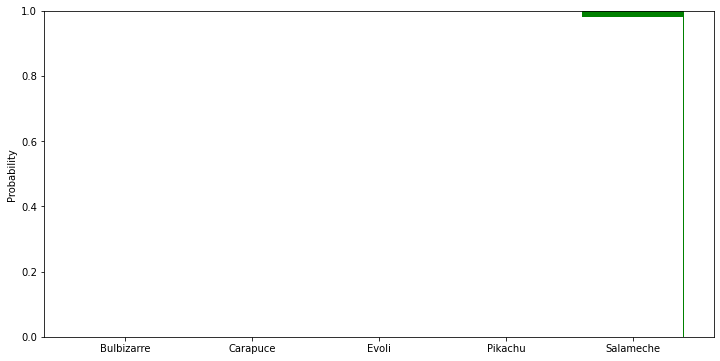

In [75]:
import_and_predict_bayes(image2_dir, label.index('Salameche'))

[[  0.   0.   0. 100.   0.]]

Pikachu


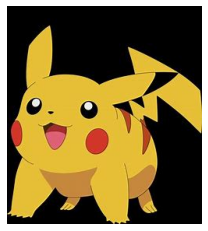

In [78]:
def bayes_import_and_predict(image_data, label):
    
    #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    #predict the image
    prediction = model_bayes.predict(img_reshape)
    print(prediction*100)
    
    label_prediction = label[np.argmax(prediction)]
    
    return label_prediction

prediction = bayes_import_and_predict(image1_dir, label)
print("")
print(prediction)